In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
from sklearn import metrics

In [ ]:
# Fungsi Eval
def eval(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'MSE : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAD : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE : {mean_absolute_percentage_error(y_true, y_pred)}')

# Fungsi b
def B(X, Y):
  b_atas = (len(X)*sum(X*Y)) - (sum(X)*sum(Y))
  b_bawah = len(X)*sum(X**2) - (sum(X)**2)
  b = b_atas / b_bawah
  return b

# Fungsi a  
def A(X, Y, B):
  a_atas = (sum(Y)) - (B*sum(X))
  a_bawah = len(X)
  a = a_atas / a_bawah
  return a

# Fungsi Indeks Musim
def im(Y1, Y2, rata):
  indeks_musim = []
  for i in range(12):
    indeks_musim.append((Y1[i] + Y2[i])/2/rata)
  return indeks_musim

# Fungsi prediksi tanpa indeks musim
def prediksi(X,a,b):
  Y_pred=[]
  for i in X:
    Y_pred.append(a+b*i)
  return Y_pred

# Fungsi prediksi dengan indeks musim
def prediksi_im(Y_pred, im):
  Y_pred_final=[]
  for i in range(7):
    Y_pred_final.append(round(Y_pred[i]*im[i]))
  return Y_pred_final

# Fungsi prediksi 2022 dengan indeks musim
def prediksi2022_im(Y_pred, im):
  Y_pred_final=[]
  for i in range(12):
    Y_pred_final.append(round(Y_pred[i]*im[i]))
  return Y_pred_final

In [ ]:
p_2022 = pd.DataFrame(data={"bulan":[1,2,3,4,5,6,7,8,9,10,11,12], "tahun":[2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022],
                                      "indeks_waktu":[24,25,26,27,28,29,30,31,32,33,34,35]})

In [ ]:
df = pd.read_csv("produk_tiap_bulan.csv")
df

,bulan,tahun,indeks_waktu,qty_apsdk,qty_ast,qty_eg,qty_gc,qty_jnk,qty_kp,qty_ka,qty_os,qty_sa
0,1,2020,0,592,165,91,50,5,2,65,17,120
1,2,2020,1,572,618,213,51,11,32,64,5,36
2,3,2020,2,312,486,30,89,2,110,16,9,27
3,4,2020,3,161,199,30,79,27,104,8,16,36
4,5,2020,4,347,493,60,20,2,64,63,8,35
5,6,2020,5,110,164,266,48,8,56,82,7,4
6,7,2020,6,159,264,175,38,27,50,164,5,61
7,8,2020,7,231,149,19,41,13,51,140,10,82
8,9,2020,8,311,230,17,82,6,85,201,9,52
9,10,2020,9,70,16,14,27,11,26,106,3,24


## apron pupuk sponge dop kuning


In [ ]:
df_apsdk = df[['bulan','tahun','indeks_waktu','qty_apsdk']]
df_apsdk

,bulan,tahun,indeks_waktu,qty_apsdk
0,1,2020,0,592
1,2,2020,1,572
2,3,2020,2,312
3,4,2020,3,161
4,5,2020,4,347
5,6,2020,5,110
6,7,2020,6,159
7,8,2020,7,231
8,9,2020,8,311
9,10,2020,9,70


In [ ]:
X = df_apsdk['indeks_waktu'].values
Y = df_apsdk['qty_apsdk'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.4080560420315236,
 1.3292469352014011,
 1.5936952714535901,
 1.0980735551663747,
 0.8231173380035026,
 0.702276707530648,
 0.9159369527145359,
 0.5376532399299475,
 1.3345008756567425,
 0.5989492119089317,
 1.4448336252189142,
 0.2136602451838879]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

347.7647058823529
-7.301470588235294


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[223.63970588235293,
 216.33823529411762,
 209.03676470588235,
 201.73529411764704,
 194.43382352941174,
 187.13235294117646,
 179.83088235294116]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[157, 198, 112, 269, 116, 270, 38]

In [ ]:
df_test = df_apsdk[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-12-a354140c9d99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_apsdk,qty_pred
17,6,2021,17,291,157
18,7,2021,18,364,198
19,8,2021,19,76,112
20,9,2021,20,451,269
21,10,2021,21,272,116
22,11,2021,22,439,270
23,12,2021,23,40,38


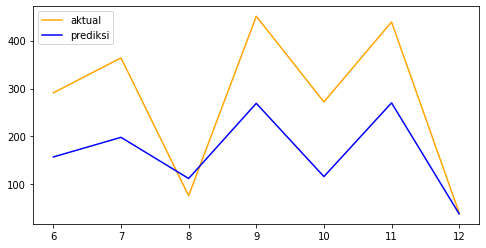

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-14-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-14-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-14-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_apsdk,qty_pred,ad,se,ape
17,6,2021,17,291,157,134,17956,46.05
18,7,2021,18,364,198,166,27556,45.60
19,8,2021,19,76,112,36,1296,47.37
20,9,2021,20,451,269,182,33124,40.35
21,10,2021,21,272,116,156,24336,57.35
22,11,2021,22,439,270,169,28561,38.50
23,12,2021,23,40,38,2,4,5.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 18976.14285714286
MAD : 120.71428571428571
MAPE : 40.032174018096704


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[172.52941176470586,
 165.22794117647058,
 157.92647058823528,
 150.62499999999997,
 143.3235294117647,
 136.0220588235294,
 128.7205882352941,
 121.41911764705881,
 114.11764705882351,
 106.8161764705882,
 99.51470588235293,
 92.21323529411762]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[243, 220, 252, 165, 118, 96, 118, 65, 152, 64, 144, 20]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,243
1,2,2022,25,220
2,3,2022,26,252
3,4,2022,27,165
4,5,2022,28,118
5,6,2022,29,96
6,7,2022,30,118
7,8,2022,31,65
8,9,2022,32,152
9,10,2022,33,64


## apron semprot taslan


In [ ]:
df_ast = df[['bulan','tahun','indeks_waktu','qty_ast']]
df_ast

,bulan,tahun,indeks_waktu,qty_ast
0,1,2020,0,165
1,2,2020,1,618
2,3,2020,2,486
3,4,2020,3,199
4,5,2020,4,493
5,6,2020,5,164
6,7,2020,6,264
7,8,2020,7,149
8,9,2020,8,230
9,10,2020,9,16


In [ ]:
X = df_ast['indeks_waktu'].values
Y = df_ast['qty_ast'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.45100671140939597,
 1.8738255033557047,
 1.476510067114094,
 0.6425055928411633,
 0.9610738255033557,
 0.7695749440715883,
 1.138255033557047,
 0.7463087248322148,
 2.1369127516778526,
 0.9199105145413871,
 0.6478747203579418,
 0.23624161073825503]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

360.4117647058824
-14.904411764705882


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[107.03676470588238,
 92.13235294117652,
 77.22794117647061,
 62.32352941176475,
 47.41911764705884,
 32.514705882352985,
 17.610294117647072]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[82, 105, 58, 133, 44, 21, 4]

In [ ]:
df_test = df_ast[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-26-a3ca2dfaf489>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_ast,qty_pred
17,6,2021,17,266,82
18,7,2021,18,372,105
19,8,2021,19,268,58
20,9,2021,20,964,133
21,10,2021,21,498,44
22,11,2021,22,193,21
23,12,2021,23,44,4


In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-27-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-27-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-27-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_ast,qty_pred,ad,se,ape
17,6,2021,17,266,82,184,33856,69.17
18,7,2021,18,372,105,267,71289,71.77
19,8,2021,19,268,58,210,44100,78.36
20,9,2021,20,964,133,831,690561,86.20
21,10,2021,21,498,44,454,206116,91.16
22,11,2021,22,193,21,172,29584,89.12
23,12,2021,23,44,4,40,1600,90.91


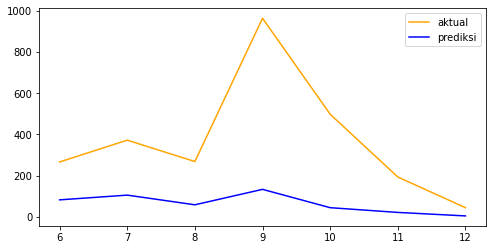

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 153872.2857142857
MAD : 308.2857142857143
MAPE : 82.3859392663711


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[2.7058823529412166,
 -12.198529411764696,
 -27.10294117647055,
 -42.007352941176464,
 -56.91176470588232,
 -71.81617647058823,
 -86.72058823529409,
 -101.625,
 -116.52941176470586,
 -131.4338235294117,
 -146.33823529411762,
 -161.24264705882348]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[1, -23, -40, -27, -55, -55, -99, -76, -249, -121, -95, -38]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,1
1,2,2022,25,-23
2,3,2022,26,-40
3,4,2022,27,-27
4,5,2022,28,-55
5,6,2022,29,-55
6,7,2022,30,-99
7,8,2022,31,-76
8,9,2022,32,-249
9,10,2022,33,-121


## earplug gosave


In [ ]:
df_eg = df[['bulan','tahun','indeks_waktu','qty_eg']]
df_eg

,bulan,tahun,indeks_waktu,qty_eg
0,1,2020,0,91
1,2,2020,1,213
2,3,2020,2,30
3,4,2020,3,30
4,5,2020,4,60
5,6,2020,5,266
6,7,2020,6,175
7,8,2020,7,19
8,9,2020,8,17
9,10,2020,9,14


In [ ]:
X = df_eg['indeks_waktu'].values
Y = df_eg['qty_eg'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.4855093256814921,
 0.8677187948350071,
 0.20659971305595407,
 0.24103299856527977,
 0.41319942611190813,
 1.4703012912482065,
 1.594261119081779,
 3.012912482065997,
 0.9124820659971306,
 0.988235294117647,
 0.5371592539454806,
 1.2705882352941176]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

118.43137254901961
-5.870098039215686


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[18.639705882352942,
 12.769607843137265,
 6.899509803921575,
 1.029411764705884,
 -4.8406862745097925,
 -10.710784313725497,
 -16.58088235294116]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[27, 20, 21, 1, -5, -6, -21]

In [ ]:
df_test = df_eg[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-40-db9f0777499b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_eg,qty_pred
17,6,2021,17,161,27
18,7,2021,18,288,20
19,8,2021,19,856,21
20,9,2021,20,248,1
21,10,2021,21,273,-5
22,11,2021,22,125,-6
23,12,2021,23,319,-21


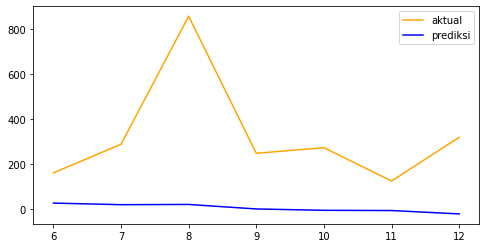

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-42-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-42-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-42-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_eg,qty_pred,ad,se,ape
17,6,2021,17,161,27,134,17956,83.23
18,7,2021,18,288,20,268,71824,93.06
19,8,2021,19,856,21,835,697225,97.55
20,9,2021,20,248,1,247,61009,99.60
21,10,2021,21,273,-5,278,77284,101.83
22,11,2021,22,125,-6,131,17161,104.80
23,12,2021,23,319,-21,340,115600,106.58


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 151151.2857142857
MAD : 319.0
MAPE : 98.09192090249688


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[-22.45098039215685,
 -28.32107843137254,
 -34.19117647058823,
 -40.06127450980392,
 -45.93137254901961,
 -51.801470588235276,
 -57.67156862745097,
 -63.54166666666666,
 -69.41176470588235,
 -75.28186274509804,
 -81.15196078431373,
 -87.02205882352942]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[-11, -25, -7, -10, -19, -76, -92, -191, -63, -74, -44, -111]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,-11
1,2,2022,25,-25
2,3,2022,26,-7
3,4,2022,27,-10
4,5,2022,28,-19
5,6,2022,29,-76
6,7,2022,30,-92
7,8,2022,31,-191
8,9,2022,32,-63
9,10,2022,33,-74


## garu cangkul


In [ ]:
df_gc = df[['bulan','tahun','indeks_waktu','qty_gc']]
df_gc

,bulan,tahun,indeks_waktu,qty_gc
0,1,2020,0,50
1,2,2020,1,51
2,3,2020,2,89
3,4,2020,3,79
4,5,2020,4,20
5,6,2020,5,48
6,7,2020,6,38
7,8,2020,7,41
8,9,2020,8,82
9,10,2020,9,27


In [ ]:
X = df_gc['indeks_waktu'].values
Y = df_gc['qty_gc'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.9636711281070746,
 0.6883365200764818,
 1.0669216061185467,
 1.3537284894837476,
 0.6653919694072657,
 2.1338432122370934,
 0.8374760994263862,
 0.49330783938814526,
 1.7667304015296366,
 1.0095602294455066,
 0.27533460803059273,
 0.7456978967495219]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

62.313725490196084
-2.8333333333333335


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[14.147058823529413,
 11.313725490196084,
 8.480392156862749,
 5.647058823529413,
 2.8137254901960844,
 -0.01960784313725128,
 -2.852941176470587]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[30, 9, 4, 10, 3, 0, -2]

In [ ]:
df_test = df_gc[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-54-bf04e59a5bc3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_gc,qty_pred
17,6,2021,17,138,30
18,7,2021,18,35,9
19,8,2021,19,2,4
20,9,2021,20,72,10
21,10,2021,21,61,3
22,11,2021,22,11,0
23,12,2021,23,53,-2


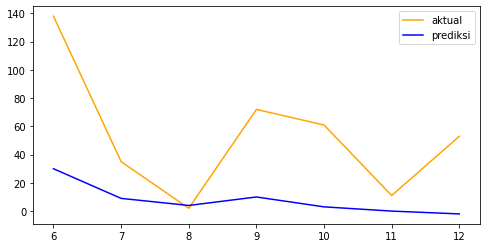

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-56-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-56-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-56-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_gc,qty_pred,ad,se,ape
17,6,2021,17,138,30,108,11664,78.26
18,7,2021,18,35,9,26,676,74.29
19,8,2021,19,2,4,2,4,100.00
20,9,2021,20,72,10,62,3844,86.11
21,10,2021,21,61,3,58,3364,95.08
22,11,2021,22,11,0,11,121,100.00
23,12,2021,23,53,-2,55,3025,103.77


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 3242.5714285714284
MAD : 46.0
MAPE : 91.07332101154542


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[-5.686274509803916,
 -8.519607843137258,
 -11.352941176470587,
 -14.186274509803916,
 -17.01960784313726,
 -19.852941176470587,
 -22.686274509803916,
 -25.51960784313726,
 -28.352941176470587,
 -31.186274509803916,
 -34.01960784313726,
 -36.85294117647059]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[-5, -6, -12, -19, -11, -42, -19, -13, -50, -31, -9, -27]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,-5
1,2,2022,25,-6
2,3,2022,26,-12
3,4,2022,27,-19
4,5,2022,28,-11
5,6,2022,29,-42
6,7,2022,30,-19
7,8,2022,31,-13
8,9,2022,32,-50
9,10,2022,33,-31


## jet nozzle - kuningan - 2.5_


In [ ]:
df_jnk = df[['bulan','tahun','indeks_waktu','qty_jnk']]
df_jnk

,bulan,tahun,indeks_waktu,qty_jnk
0,1,2020,0,5
1,2,2020,1,11
2,3,2020,2,2
3,4,2020,3,27
4,5,2020,4,2
5,6,2020,5,8
6,7,2020,6,27
7,8,2020,7,13
8,9,2020,8,6
9,10,2020,9,11


In [ ]:
X = df_jnk['indeks_waktu'].values
Y = df_jnk['qty_jnk'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.9357798165137614,
 0.38532110091743116,
 0.9357798165137614,
 1.128440366972477,
 0.38532110091743116,
 0.9633027522935779,
 2.477064220183486,
 2.036697247706422,
 0.5779816513761468,
 1.1009174311926604,
 0.8807339449541284,
 0.19266055045871558]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

9.098039215686276
0.5465686274509803


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[18.389705882352942,
 18.936274509803923,
 19.482843137254903,
 20.029411764705884,
 20.575980392156865,
 21.122549019607845,
 21.669117647058826]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[18, 47, 40, 12, 23, 19, 4]

In [ ]:
df_test = df_jnk[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-68-56e85fb7d759>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_jnk,qty_pred
17,6,2021,17,27,18
18,7,2021,18,63,47
19,8,2021,19,61,40
20,9,2021,20,15,12
21,10,2021,21,29,23
22,11,2021,22,9,19
23,12,2021,23,3,4


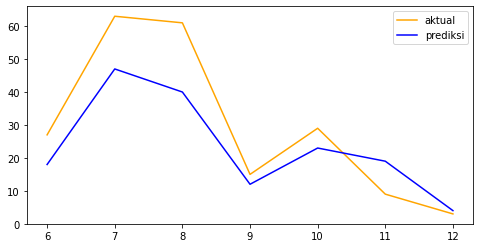

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-70-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-70-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-70-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_jnk,qty_pred,ad,se,ape
17,6,2021,17,27,18,9,81,33.33
18,7,2021,18,63,47,16,256,25.40
19,8,2021,19,61,40,21,441,34.43
20,9,2021,20,15,12,3,9,20.00
21,10,2021,21,29,23,6,36,20.69
22,11,2021,22,9,19,10,100,111.11
23,12,2021,23,3,4,1,1,33.33


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 132.0
MAD : 9.428571428571429
MAPE : 39.75578397931624


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[22.215686274509807,
 22.762254901960784,
 23.308823529411764,
 23.855392156862745,
 24.401960784313726,
 24.948529411764707,
 25.495098039215684,
 26.041666666666664,
 26.588235294117645,
 27.134803921568626,
 27.681372549019606,
 28.227941176470587]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[21, 9, 22, 27, 9, 24, 63, 53, 15, 30, 24, 5]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,21
1,2,2022,25,9
2,3,2022,26,22
3,4,2022,27,27
4,5,2022,28,9
5,6,2022,29,24
6,7,2022,30,63
7,8,2022,31,53
8,9,2022,32,15
9,10,2022,33,30


## kapak pulaski


In [ ]:
df_kp = df[['bulan','tahun','indeks_waktu','qty_kp']]
df_kp

,bulan,tahun,indeks_waktu,qty_kp
0,1,2020,0,2
1,2,2020,1,32
2,3,2020,2,110
3,4,2020,3,104
4,5,2020,4,64
5,6,2020,5,56
6,7,2020,6,50
7,8,2020,7,51
8,9,2020,8,85
9,10,2020,9,26


In [ ]:
X = df_kp['indeks_waktu'].values
Y = df_kp['qty_kp'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.3341772151898734,
 0.830379746835443,
 1.3974683544303796,
 1.4379746835443037,
 1.0227848101265822,
 1.9037974683544303,
 0.9316455696202531,
 0.5772151898734177,
 1.0430379746835443,
 1.589873417721519,
 0.5164556962025316,
 0.4151898734177215]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

62.35294117647059
-1.9191176470588236


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[29.727941176470587,
 27.80882352941176,
 25.889705882352942,
 23.970588235294116,
 22.05147058823529,
 20.13235294117647,
 18.213235294117645]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[57, 26, 15, 25, 35, 10, 8]

In [ ]:
df_test = df_kp[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-82-0d43272954e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_kp,qty_pred
17,6,2021,17,132,57
18,7,2021,18,42,26
19,8,2021,19,6,15
20,9,2021,20,18,25
21,10,2021,21,131,35
22,11,2021,22,28,10
23,12,2021,23,29,8


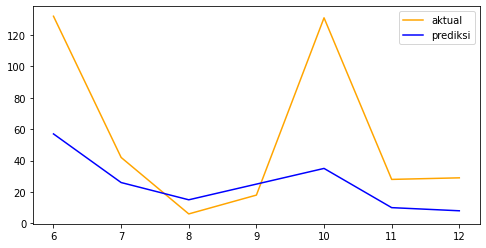

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-84-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-84-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-84-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_kp,qty_pred,ad,se,ape
17,6,2021,17,132,57,75,5625,56.82
18,7,2021,18,42,26,16,256,38.10
19,8,2021,19,6,15,9,81,150.00
20,9,2021,20,18,25,7,49,38.89
21,10,2021,21,131,35,96,9216,73.28
22,11,2021,22,28,10,18,324,64.29
23,12,2021,23,29,8,21,441,72.41


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 2284.5714285714284
MAD : 34.57142857142857
MAPE : 70.54060841993757


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[16.29411764705882,
 14.375,
 12.455882352941174,
 10.536764705882348,
 8.617647058823529,
 6.698529411764703,
 4.779411764705877,
 2.860294117647058,
 0.941176470588232,
 -0.9779411764705941,
 -2.897058823529413,
 -4.816176470588239]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[5, 12, 17, 15, 9, 13, 4, 2, 1, -2, -1, -2]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,5
1,2,2022,25,12
2,3,2022,26,17
3,4,2022,27,15
4,5,2022,28,9
5,6,2022,29,13
6,7,2022,30,4
7,8,2022,31,2
8,9,2022,32,1
9,10,2022,33,-2


## kepyok api


In [ ]:
df_ka = df[['bulan','tahun','indeks_waktu','qty_ka']]
df_ka

,bulan,tahun,indeks_waktu,qty_ka
0,1,2020,0,65
1,2,2020,1,64
2,3,2020,2,16
3,4,2020,3,8
4,5,2020,4,63
5,6,2020,5,82
6,7,2020,6,164
7,8,2020,7,140
8,9,2020,8,201
9,10,2020,9,106


In [ ]:
X = df_ka['indeks_waktu'].values
Y = df_ka['qty_ka'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.183723797780518,
 1.0801479654747226,
 0.3921085080147966,
 0.5252774352651048,
 0.9173859432799014,
 0.8581997533908755,
 1.5166461159062887,
 1.4056720098643651,
 1.6128236744759556,
 1.2281134401972873,
 0.6140567200986436,
 0.6658446362515413]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

74.41176470588235
0.6617647058823529


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[85.66176470588235,
 86.3235294117647,
 86.98529411764706,
 87.6470588235294,
 88.30882352941175,
 88.97058823529412,
 89.63235294117646]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[74, 131, 122, 141, 108, 55, 60]

In [ ]:
df_test = df_ka[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-96-0707cff42cc8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_ka,qty_pred
17,6,2021,17,34,74
18,7,2021,18,41,131
19,8,2021,19,50,122
20,9,2021,20,17,141
21,10,2021,21,60,108
22,11,2021,22,52,55
23,12,2021,23,13,60


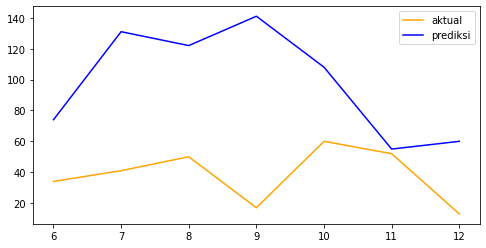

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-98-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-98-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-98-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,bulan,tahun,indeks_waktu,qty_ka,qty_pred,ad,se,ape
17,6,2021,17,34,74,40,1600,117.65
18,7,2021,18,41,131,90,8100,219.51
19,8,2021,19,50,122,72,5184,144.00
20,9,2021,20,17,141,124,15376,729.41
21,10,2021,21,60,108,48,2304,80.00
22,11,2021,22,52,55,3,9,5.77
23,12,2021,23,13,60,47,2209,361.54


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 4968.857142857143
MAD : 60.57142857142857
MAPE : 236.83981585129362


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[90.29411764705881,
 90.95588235294117,
 91.61764705882352,
 92.27941176470588,
 92.94117647058823,
 93.60294117647058,
 94.26470588235293,
 94.92647058823529,
 95.58823529411764,
 96.25,
 96.91176470588235,
 97.5735294117647]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[107, 98, 36, 48, 85, 80, 143, 133, 154, 118, 60, 65]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,107
1,2,2022,25,98
2,3,2022,26,36
3,4,2022,27,48
4,5,2022,28,85
5,6,2022,29,80
6,7,2022,30,143
7,8,2022,31,133
8,9,2022,32,154
9,10,2022,33,118


## obor sulut


In [ ]:
df_os = df[['bulan','tahun','indeks_waktu','qty_os']]
df_os

,bulan,tahun,indeks_waktu,qty_os
0,1,2020,0,17
1,2,2020,1,5
2,3,2020,2,9
3,4,2020,3,16
4,5,2020,4,8
5,6,2020,5,7
6,7,2020,6,5
7,8,2020,7,10
8,9,2020,8,9
9,10,2020,9,3


In [ ]:
X = df_os['indeks_waktu'].values
Y = df_os['qty_os'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.8461538461538463,
 0.5274725274725275,
 0.7912087912087913,
 1.8461538461538463,
 0.9230769230769231,
 0.9230769230769231,
 0.5274725274725275,
 0.7912087912087913,
 0.7912087912087913,
 1.8461538461538463,
 0.8571428571428572,
 0.32967032967032966]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

10.764705882352942
-0.33088235294117646


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[5.139705882352942,
 4.808823529411765,
 4.47794117647059,
 4.147058823529413,
 3.8161764705882364,
 3.4852941176470598,
 3.154411764705883]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[5, 3, 4, 3, 7, 3, 1]

In [ ]:
df_test = df_os[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-110-3f8f21b3b03e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_os,qty_pred
17,6,2021,17,7,5
18,7,2021,18,3,3
19,8,2021,19,2,4
20,9,2021,20,3,3
21,10,2021,21,25,7
22,11,2021,22,2,3
23,12,2021,23,2,1


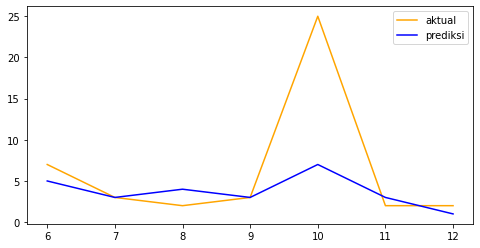

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-112-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-112-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-112-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,bulan,tahun,indeks_waktu,qty_os,qty_pred,ad,se,ape
17,6,2021,17,7,5,2,4,28.57
18,7,2021,18,3,3,0,0,0.00
19,8,2021,19,2,4,2,4,100.00
20,9,2021,20,3,3,0,0,0.00
21,10,2021,21,25,7,18,324,72.00
22,11,2021,22,2,3,1,1,50.00
23,12,2021,23,2,1,1,1,50.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 47.714285714285715
MAD : 3.4285714285714284
MAPE : 42.938775510204074


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[2.8235294117647065,
 2.4926470588235308,
 2.1617647058823533,
 1.8308823529411775,
 1.5000000000000018,
 1.1691176470588243,
 0.8382352941176485,
 0.507352941176471,
 0.17647058823529527,
 -0.15441176470588047,
 -0.485294117647058,
 -0.8161764705882337]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[5, 1, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,5
1,2,2022,25,1
2,3,2022,26,2
3,4,2022,27,3
4,5,2022,28,1
5,6,2022,29,1
6,7,2022,30,0
7,8,2022,31,0
8,9,2022,32,0
9,10,2022,33,0


## sekop api


In [ ]:
df_sa = df[['bulan','tahun','indeks_waktu','qty_sa']]
df_sa

,bulan,tahun,indeks_waktu,qty_sa
0,1,2020,0,120
1,2,2020,1,36
2,3,2020,2,27
3,4,2020,3,36
4,5,2020,4,35
5,6,2020,5,4
6,7,2020,6,61
7,8,2020,7,82
8,9,2020,8,52
9,10,2020,9,24


In [ ]:
X = df_sa['indeks_waktu'].values
Y = df_sa['qty_sa'].values
df_2022 = p_2022
X_2022 = df_2022['indeks_waktu'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.9739217652958878,
 0.7823470411233702,
 0.5536609829488466,
 0.6379137412236711,
 1.0471414242728185,
 1.925777331995988,
 1.2758274824473421,
 1.0832497492477433,
 1.5646940822467403,
 0.49348044132397195,
 0.21664994984954866,
 0.44533600802407225]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

55.725490196078425
-2.142156862745098


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[19.30882352941176,
 17.166666666666664,
 15.02450980392156,
 12.882352941176464,
 10.740196078431367,
 8.59803921568627,
 6.455882352941174]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[37, 22, 16, 20, 5, 2, 3]

In [ ]:
df_test = df_sa[-7:]
ad = []
se = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-124-8988618795f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_sa,qty_pred
17,6,2021,17,156,37
18,7,2021,18,45,22
19,8,2021,19,8,16
20,9,2021,20,78,20
21,10,2021,21,17,5
22,11,2021,22,6,2
23,12,2021,23,31,3


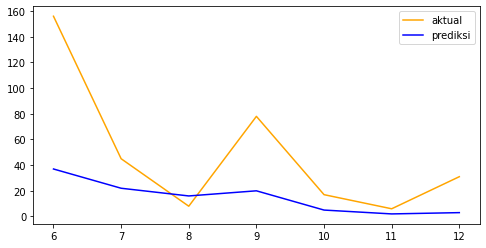

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['se'] = se
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-126-2560fbd1e31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-126-2560fbd1e31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['se'] = se
<ipython-input-126-2560fbd1e31f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,bulan,tahun,indeks_waktu,qty_sa,qty_pred,ad,se,ape
17,6,2021,17,156,37,119,14161,76.28
18,7,2021,18,45,22,23,529,51.11
19,8,2021,19,8,16,8,64,100.00
20,9,2021,20,78,20,58,3364,74.36
21,10,2021,21,17,5,12,144,70.59
22,11,2021,22,6,2,4,16,66.67
23,12,2021,23,31,3,28,784,90.32


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MSE : 2723.1428571428573
MAD : 36.0
MAPE : 75.61851705115463


In [ ]:
Y_pred_2022 = prediksi(X_2022,a_train,b_train)
Y_pred_2022

[4.313725490196077,
 2.1715686274509736,
 0.02941176470587692,
 -2.1127450980392197,
 -4.254901960784316,
 -6.397058823529413,
 -8.539215686274517,
 -10.681372549019613,
 -12.82352941176471,
 -14.965686274509807,
 -17.107843137254903,
 -19.25]

In [ ]:
Y_pred2022_final = prediksi2022_im(Y_pred_2022, indeks_musim)
Y_pred2022_final

[9, 2, 0, -1, -4, -12, -11, -12, -20, -7, -4, -9]

In [ ]:
df_2022['qty_pred'] = Y_pred2022_final
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,indeks_waktu,qty_pred
0,1,2022,24,9
1,2,2022,25,2
2,3,2022,26,0
3,4,2022,27,-1
4,5,2022,28,-4
5,6,2022,29,-12
6,7,2022,30,-11
7,8,2022,31,-12
8,9,2022,32,-20
9,10,2022,33,-7
